Virtual Acoustics and Immersive Audio Workshop - CCRMA Stanford University  
23.07.25 - Orchisama Das, Gloria Dal Santo
  
### L03: Artificial Reverberation with Delay Networks

In this assignment we will 
- Create a Feedback Delay Network
- Generate various orthogonal feedback matrices: identity, random orthogonal, Hadamard, Householder (See [Table](https://dafx2020.mdw.ac.at/proceedings/papers/DAFx2020_paper_53.pdf)).
- Implement time-domain processing for mono input/output with any number of delay lines.
- Process the anechoic signals from Assignment 2 with the FDN. Use an impulse to hear the impulse response.
- Modify FDN parameters and size; observe and listen to how they affect the output.

In [1]:
# --- Imports ---
import numpy as np
import IPython.display as ipd

from pathlib import Path
from room_acoustics.fdn import FeedbackDelayNetwork

from utils import audioread
from room_acoustics.plot import plot_time_domain

#### 1. Create a Feedback Delay Network

Head to `room_acoustics.fdn`, you will find a partially coded class `FeedbackDelayNetwork`. You will have to
- 1.1 Complete the `get_feedback_matrix` method that generates the feedback matrix based on the specified type. 
- 1.2 Complete the `process` function that perform time domain processing of an input signal through the FDN
- 1.3 In the cell below, generate and impulse signal and process it with the FDN to obtain the synthetic RIR. 
- 1.4 Process the dry signals `data/Drums.wav`, `data/Sax.wav`, and `data/Speech.wav`. 

In [2]:
# --- Imports ---
import numpy as np
import IPython.display as ipd

from pathlib import Path
from room_acoustics.fdn import FeedbackDelayNetwork

from utils import audioread
from room_acoustics.plot import plot_time_domain

############### khaledt: TESTS
# Test identity
# TODO: test identity
# TODO: test hadamard
# TODO: test householder


# Table-based test for arbitrary parameters using dictionaries (no sample_rate or t60)
import numpy as np


test_cases = [
       {
        "params": {
            "delay_lengths": [3,3,3,3],
            "feedback_matrix_type": "identity"
        },
        "input": np.array([1.0, 2.0, 3.0, 4.0]),  # Single sample input
        "expected_len": 1
    },
    # {
    #     "params": {
    #         "delay_lengths": [809, 877, 937, 1049],
    #         "feedback_matrix_type": "random"
    #     },
    #     "input": np.zeros(10),
    #     "expected_len": 10
    # },
    # {
    #     "params": {
    #         "delay_lengths": [809, 877, 937, 1049, 1151, 1249, 1373, 1499],
    #         "feedback_matrix_type": "random"
    #     },
    #     "input": np.arange(20),
    #     "expected_len": 20
    # },
    # {
    #     "params": {
    #         "delay_lengths": [500, 600, 700, 800],
    #         "feedback_matrix_type": "householder"
    #     },
    #     "input": np.ones(5),
    #     "expected_len": 5
    # }
]

test_fs = 44100  # Example sample rate
test_t60 = 2.0  # Example reverberation time

results = []
for case in test_cases:
    delay_lengths = case["params"]["delay_lengths"]
    feedback_matrix_type = case["params"]["feedback_matrix_type"]
    # Explicitly pass parameters
    fdn = FeedbackDelayNetwork(
        sample_rate = test_fs,
        delay_lengths=delay_lengths,
        feedback_matrix_type=feedback_matrix_type,
        t60 = test_t60
    )
    fdn.process(case["input"])
    output = fdn.output
    results.append({
        "Delay Lengths": delay_lengths,
        "Matrix Type": feedback_matrix_type,
        "Input Shape": case["input"].shape,
        "Expected Output Length": case["expected_len"],
        "Actual Output Length": len(output),
        "Pass": len(output) == case["expected_len"]
    })

# Print results as a simple table
print("Delay Lengths\t\tMatrix Type\tInput Shape\tExpected\tActual\tPass")
for r in results:
    print(f"{r['Delay Lengths']}\t{r['Matrix Type']}\t{r['Input Shape']}\t{r['Expected Output Length']}\t\t{r['Actual Output Length']}\t{r['Pass']}")


Delay Lengths		Matrix Type	Input Shape	Expected	Actual	Pass
[3, 3, 3, 3]	identity	(4,)	1		4	False


FDN output length: 48000
FDN output shape: [ 0.          0.          0.         ...  0.00011227 -0.00488431
 -0.00246748]


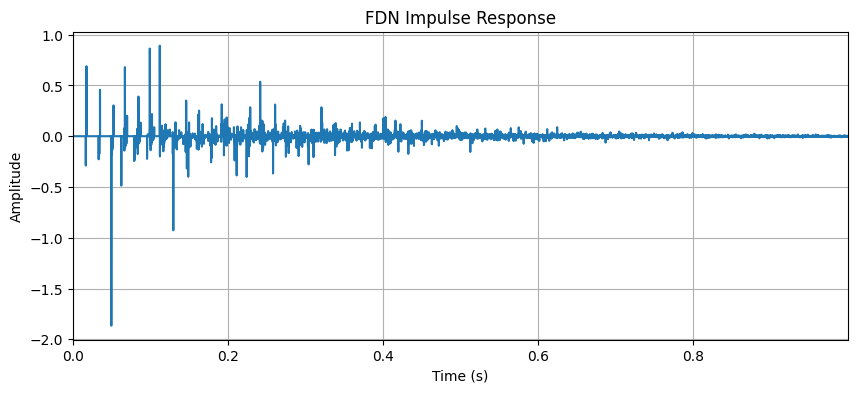

In [5]:
# --- FDN Impulse Response ---
fs = 48000
fdn = FeedbackDelayNetwork(
    sample_rate = fs,
    delay_lengths=[797, 839, 2381, 2999],
    feedback_matrix_type='random',
    t60 = 2.0
)

### WRITE YOUR CODE HERE ###
# generate an impulse signal
impulse = np.zeros(fs * 1)
impulse[0] = 1.0  # Set the first sample to 1.
fdn.process(impulse)
print(f"FDN output length: {len(fdn.output)}")
print(f"FDN output shape: {fdn.output[100:]}")
plot_time_domain(fdn.output, fs=fs, title='FDN Impulse Response')
ipd.display(ipd.Audio(fdn.output, rate=fs))

#### 2. Process Anechoic Signals 

Process the dry signals `data/Drums.wav`, `data/Sax.wav`, and `data/Speech.wav`. 

In [6]:
# --- Process Anechoic Sounds with the FDN ---
anechoic = ['Drums', 'Sax', 'Speech']

for filename in anechoic:
    rec_path = Path('..') / 'data' / f'{filename}.wav'
    rec, fs = audioread(str(rec_path))
    fdn.process(rec)

    print(f"{filename}")
    ipd.display(ipd.Audio(fdn.output, rate=fs))


Drums


Sax


Speech


#### 3. Try different parameters! 

You can try different combinations of parameters: 
- Change the size of the FDN. What is a good sounding size? 
- Change the type of feedback matrix and the length of the delay lines.
- If you have time, you can try to implement a simple first order low pass filer instead of the homogenous loss. 